In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
device_name = tf.test.gpu_device_name()
print(device_name)


Bad key "text.kerning_factor" on line 4 in
C:\Users\yumin\.conda\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Read the total Canadian confirmed data, generating initial
initial=pd.read_csv('C:/Users/yumin/Desktop/RNN confirmed/Italy_confirmed.csv')
pd.DataFrame(initial,columns=range(0,100))
print(type(initial))
initial.columns

<class 'pandas.core.frame.DataFrame'>


Index(['Country/Region', 'Lat', 'Long', '2001/1/21', '2001/2/21', '2001/3/21',
       '2001/4/21', '2001/5/21', '2001/6/21', '2001/7/21',
       ...
       '3/31/21', '2004/1/21', '2004/2/21', '2004/3/21', '2004/4/21',
       '2004/5/21', '2004/6/21', '2004/7/21', '2004/8/21', '2004/9/21'],
      dtype='object', length=102)

In [3]:
#Delete columns unrelated to this code, generating INITIAL_DROPCONLUMS
initial_dropconlums=initial.drop(['Country/Region','Lat','Long'],axis=1)

In [4]:
#Change the INDEX in the INITIAL_DROPCONLUMS table to a number
initial_dropconlums.columns=range(0,initial_dropconlums.shape[1])
print(initial_dropconlums)

        0        1        2        3        4        5        6        7   \
0  2129376  2141201  2155446  2166244  2181619  2201945  2220361  2237890   

        8        9   ...       89       90       91       92       93  \
0  2257866  2276491  ...  3584899  3607083  3629000  3650247  3668264   

        94       95       96       97       98  
0  3678944  3686707  3700393  3717602  3736526  

[1 rows x 99 columns]


In [5]:
#Change the cumulative confirmed data into new data every day and save it into a CSV file
import numpy as np
ay=np.zeros((initial_dropconlums.shape[1],initial_dropconlums.shape[0]))
for a in range(98):
    deffirence=initial_dropconlums[a+1]-initial_dropconlums[a]
    ay[a]=deffirence    

print(ay.shape)
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/Italy_deffirence.csv',index_col=None,names=range(1,100))
np.savetxt("C:/Users/yumin/Desktop/ENEL 645/final/Italy_deffirence.csv", ay, delimiter=",")
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/Italy_deffirence.csv',index_col=None)

(99, 1)


In [6]:
print(traindata)
traindata.shape

    1.182500000000000000e+04
0                    14245.0
1                    10798.0
2                    15375.0
3                    20326.0
4                    18416.0
..                       ...
93                    7763.0
94                   13686.0
95                   17209.0
96                   18924.0
97                       0.0

[98 rows x 1 columns]


(98, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
class data_preprocessing:
    def __init__(self,train_data,date):
        self.train_data = train_data
        self.date = date
    def train_test_split_data(train_data,date):
        dates=list(date.columns)
        dates1=dates[4:]
        dates=np.array(dates1)
        train_data=train_data.values
        nsplit1 = int(0.6*train_data.shape[0])
        nsplit2 = int(0.8*train_data.shape[0])
        X_train = train_data[:nsplit1]
        X_test = train_data[nsplit1:nsplit2]
        X_valid= train_data[nsplit2:]
        test_start_date=dates[-7]
        print(test_start_date)
        day=[]
        for i in range(0,100):
          day.append(i+1)
        day=np.array(day)
        print(day)
        return X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid
    def traindata_MinMaxScaler():
        X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)   
        scaler=MinMaxScaler(feature_range = (0,1))
        training_set_scaled = scaler.fit_transform(X_train)
        test_set_scaled = scaler.fit_transform(X_test)
        valid_set_scaled = scaler.fit_transform(X_valid)
        
        return training_set_scaled,test_set_scaled,scaler,valid_set_scaled
    def create_y_train(self):
#         X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)
#         scaler = MinMaxScaler.fit(train_fit)
        
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
#         org_dataframe=training_set_scaled
#         training_set_scaled=scaler.fit_transform(org_dataframe.reshape(-1,1))
#         print(len(training_set_scaled))
        time_steps=10
        x_data=[]
        y_data=[]
        for i in range(time_steps,len(training_set_scaled)):
          x_data.append(training_set_scaled[i-time_steps:i,0])
          y_data.append(training_set_scaled[i,0])
        x_data=np.array(x_data)
        print("x_data_shape",x_data.shape)
        y_data=np.array(y_data)
        print("y_data_shape",y_data.shape)
        x_data=np.reshape(x_data,(x_data.shape[0],x_data.shape[1],1))
        y_data=np.reshape(y_data,(y_data.shape[0],1))
        print('Reshaped x_data shape' , x_data.shape)
        print('Reshaped y_data shape' , y_data.shape)
        print(x_data.shape[1])
        return x_data,y_data
    def create_y_test(self):
        time_steps=10
        x_test=[]
        y_test=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(test_set_scaled)):
          x_test.append(test_set_scaled[i-time_steps:i])
          y_test.append(training_set_scaled[i,0])

        x_test=np.array(x_test)
        y_test=np.array(y_test)
        y_test=np.reshape(y_test,(y_test.shape[0],1))
        return x_test,y_test
    def create_y_valid(self):
        time_steps=10
        x_valid=[]
        y_valid=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(valid_set_scaled)):
          x_valid.append(valid_set_scaled[i-time_steps:i])
          y_valid.append(valid_set_scaled[i,0])

        x_valid=np.array(x_valid)
        y_valid=np.array(y_valid)
        y_valid=np.reshape(y_valid,(y_valid.shape[0],1))
        return x_valid,y_valid



# X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
preprocessing=data_preprocessing(traindata,initial)
X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
# training_set_scaled,test_set_scaled=preprocessing.traindata_MinMaxScaler()
training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
x_data,y_data=preprocessing.create_y_train()
x_test,y_test=preprocessing.create_y_test()
x_valid,y_valid=preprocessing.create_y_valid()
data_preprocessing.train_test_split_data(traindata,initial)
# print(x_data)

2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  

(array([[14245.],
        [10798.],
        [15375.],
        [20326.],
        [18416.],
        [17529.],
        [19976.],
        [18625.],
        [12530.],
        [14242.],
        [15773.],
        [17243.],
        [16144.],
        [16310.],
        [12544.],
        [ 8825.],
        [10496.],
        [13568.],
        [14055.],
        [13633.],
        [13331.],
        [11628.],
        [ 8559.],
        [10584.],
        [15191.],
        [14360.],
        [13563.],
        [12713.],
        [11249.],
        [ 7925.],
        [ 9651.],
        [13182.],
        [13656.],
        [14213.],
        [13439.],
        [11640.],
        [ 7969.],
        [10612.],
        [12947.],
        [15137.],
        [13893.],
        [13523.],
        [11060.],
        [ 7344.],
        [10368.],
        [12066.],
        [13755.],
        [15470.],
        [14914.],
        [13450.],
        [ 9617.],
        [13299.],
        [16402.],
        [19871.],
        [20488.],
        [1

In [8]:
print(y_data.shape)

(48, 1)


In [9]:
import tensorflow.keras as models
n_hidden_units=20
model = models.Sequential()
model.add(tf.keras.layers.GRU(units=50,return_sequences=True,recurrent_dropout=0.2,input_shape=(x_data.shape[1],1)))
# model.add(tf.keras.layers.Masking(mask_value=1, input_shape=(x_data.shape[1],1)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,#多层时需设置为true
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),

# model.add(tf.keras.layers.GRU(512, 
#                              return_sequences=True, 
#                             kernel_initializer='orthogonal', activation='selu'))
# model.add(tf.keras.layers.Dropout(0.5))
# embedding_dim, input_dim=embedding_dim, consume_less='mem', return_sequences=True
# model.add(Attention(keras.layers.wrappers))
# model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.add(tf.keras.layers.Dense(units=1))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.core.Activation('sigmoid'))
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['mae'])
model.summary()
#  kernel_regularizer=regularizers.l2(0.01),

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10, 50)            7950      
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 40)            8640      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 40)            7440      
_________________________________________________________________
dense (Dense)                (None, 10, 1)             41        
Total params: 24,071
Trainable params: 24,071
Non-trainable params: 0
_________________________________________________________________


Epoch 1/600
5/5 [==============================] - 1s 275ms/step - loss: 0.1591 - mae: 0.2958 - val_loss: 0.0484 - val_mae: 0.1821
Epoch 2/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0735 - mae: 0.2117 - val_loss: 0.0470 - val_mae: 0.1805
Epoch 3/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0631 - mae: 0.1903 - val_loss: 0.0511 - val_mae: 0.1895
Epoch 4/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0635 - mae: 0.1958 - val_loss: 0.0438 - val_mae: 0.1749
Epoch 5/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0552 - mae: 0.1845 - val_loss: 0.0478 - val_mae: 0.1785
Epoch 6/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0676 - mae: 0.2097 - val_loss: 0.0479 - val_mae: 0.1828
Epoch 7/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0560 - mae: 0.1914 - val_loss: 0.0428 - val_mae: 0.1713
Epoch 8/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0532 - mae: 0.1

5/5 [==============================] - 0s 22ms/step - loss: 0.0494 - mae: 0.1725 - val_loss: 0.0388 - val_mae: 0.1636
Epoch 64/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0526 - mae: 0.1803 - val_loss: 0.0375 - val_mae: 0.1569
Epoch 65/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0516 - mae: 0.1803 - val_loss: 0.0372 - val_mae: 0.1581
Epoch 66/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0472 - mae: 0.1704 - val_loss: 0.0508 - val_mae: 0.1791
Epoch 67/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0490 - mae: 0.1699 - val_loss: 0.0372 - val_mae: 0.1564
Epoch 68/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0529 - mae: 0.1771 - val_loss: 0.0371 - val_mae: 0.1579
Epoch 69/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0480 - mae: 0.1724 - val_loss: 0.0399 - val_mae: 0.1650
Epoch 70/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0482 - mae: 0.1708 - 

5/5 [==============================] - 0s 22ms/step - loss: 0.0427 - mae: 0.1674 - val_loss: 0.0309 - val_mae: 0.1375
Epoch 126/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0387 - mae: 0.1497 - val_loss: 0.0451 - val_mae: 0.1596
Epoch 127/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0433 - mae: 0.1607 - val_loss: 0.0437 - val_mae: 0.1570
Epoch 128/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0394 - mae: 0.1611 - val_loss: 0.0446 - val_mae: 0.1585
Epoch 129/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0314 - mae: 0.1389 - val_loss: 0.0460 - val_mae: 0.1617
Epoch 130/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0359 - mae: 0.1456 - val_loss: 0.0344 - val_mae: 0.1376
Epoch 131/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0353 - mae: 0.1417 - val_loss: 0.0372 - val_mae: 0.1429
Epoch 132/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0266 - mae: 0.

5/5 [==============================] - 0s 22ms/step - loss: 0.0162 - mae: 0.1014 - val_loss: 0.1376 - val_mae: 0.2913
Epoch 188/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0267 - mae: 0.1284 - val_loss: 0.1119 - val_mae: 0.2457
Epoch 189/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0244 - mae: 0.1255 - val_loss: 0.1348 - val_mae: 0.2868
Epoch 190/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0286 - mae: 0.1280 - val_loss: 0.1161 - val_mae: 0.2615
Epoch 191/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0210 - mae: 0.1163 - val_loss: 0.0967 - val_mae: 0.2594
Epoch 192/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0262 - mae: 0.1285 - val_loss: 0.1008 - val_mae: 0.2352
Epoch 193/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0185 - mae: 0.1080 - val_loss: 0.1268 - val_mae: 0.2747
Epoch 194/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0166 - mae: 0.

5/5 [==============================] - 0s 28ms/step - loss: 0.0180 - mae: 0.1028 - val_loss: 0.1191 - val_mae: 0.2852
Epoch 250/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0133 - mae: 0.0872 - val_loss: 0.0835 - val_mae: 0.2079
Epoch 251/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0176 - mae: 0.1042 - val_loss: 0.0877 - val_mae: 0.2400
Epoch 252/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0147 - mae: 0.0958 - val_loss: 0.0918 - val_mae: 0.2233
Epoch 253/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0142 - mae: 0.0925 - val_loss: 0.0859 - val_mae: 0.2152
Epoch 254/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0171 - mae: 0.1024 - val_loss: 0.0975 - val_mae: 0.2463
Epoch 255/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0161 - mae: 0.0992 - val_loss: 0.0908 - val_mae: 0.2282
Epoch 256/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0155 - mae: 0.

5/5 [==============================] - 0s 22ms/step - loss: 0.0102 - mae: 0.0811 - val_loss: 0.0948 - val_mae: 0.2277
Epoch 312/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0132 - mae: 0.0856 - val_loss: 0.0737 - val_mae: 0.1983
Epoch 313/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0109 - mae: 0.0824 - val_loss: 0.0866 - val_mae: 0.2200
Epoch 314/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0101 - mae: 0.0784 - val_loss: 0.0784 - val_mae: 0.2057
Epoch 315/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0129 - mae: 0.0842 - val_loss: 0.0964 - val_mae: 0.2468
Epoch 316/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0097 - mae: 0.0778 - val_loss: 0.1033 - val_mae: 0.2587
Epoch 317/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0100 - mae: 0.0816 - val_loss: 0.0812 - val_mae: 0.2133
Epoch 318/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0098 - mae: 0.

5/5 [==============================] - 0s 27ms/step - loss: 0.0083 - mae: 0.0731 - val_loss: 0.1016 - val_mae: 0.2374
Epoch 374/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0100 - mae: 0.0767 - val_loss: 0.0704 - val_mae: 0.1962
Epoch 375/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0109 - mae: 0.0822 - val_loss: 0.0817 - val_mae: 0.2128
Epoch 376/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0105 - mae: 0.0796 - val_loss: 0.0979 - val_mae: 0.2485
Epoch 377/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0092 - mae: 0.0770 - val_loss: 0.1123 - val_mae: 0.2806
Epoch 378/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0085 - mae: 0.0744 - val_loss: 0.1072 - val_mae: 0.2733
Epoch 379/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0132 - mae: 0.0932 - val_loss: 0.0815 - val_mae: 0.2078
Epoch 380/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0072 - mae: 0.

Epoch 435/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0074 - mae: 0.0679 - val_loss: 0.1110 - val_mae: 0.2585
Epoch 436/600
5/5 [==============================] - 0s 40ms/step - loss: 0.0066 - mae: 0.0663 - val_loss: 0.0964 - val_mae: 0.2350
Epoch 437/600
5/5 [==============================] - 0s 40ms/step - loss: 0.0119 - mae: 0.0856 - val_loss: 0.0947 - val_mae: 0.2410
Epoch 438/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0099 - mae: 0.0795 - val_loss: 0.1111 - val_mae: 0.2514
Epoch 439/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0087 - mae: 0.0739 - val_loss: 0.1155 - val_mae: 0.2582
Epoch 440/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0085 - mae: 0.0705 - val_loss: 0.1307 - val_mae: 0.2973
Epoch 441/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0075 - mae: 0.0701 - val_loss: 0.1159 - val_mae: 0.2717
Epoch 442/600
5/5 [==============================] - 0s 35ms/step - loss: 0.

5/5 [==============================] - 0s 32ms/step - loss: 0.0064 - mae: 0.0629 - val_loss: 0.1102 - val_mae: 0.2490
Epoch 498/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0068 - mae: 0.0670 - val_loss: 0.1069 - val_mae: 0.2426
Epoch 499/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0062 - mae: 0.0623 - val_loss: 0.1013 - val_mae: 0.2394
Epoch 500/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0055 - mae: 0.0577 - val_loss: 0.1164 - val_mae: 0.2722
Epoch 501/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0062 - mae: 0.0633 - val_loss: 0.0873 - val_mae: 0.2208
Epoch 502/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0069 - mae: 0.0631 - val_loss: 0.1098 - val_mae: 0.2586
Epoch 503/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0054 - mae: 0.0580 - val_loss: 0.1033 - val_mae: 0.2411
Epoch 504/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0066 - mae: 0.

Epoch 559/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0048 - mae: 0.0527 - val_loss: 0.1053 - val_mae: 0.2523
Epoch 560/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0054 - mae: 0.0611 - val_loss: 0.1521 - val_mae: 0.3280
Epoch 561/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0102 - mae: 0.0781 - val_loss: 0.1127 - val_mae: 0.2624
Epoch 562/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0085 - mae: 0.0720 - val_loss: 0.1224 - val_mae: 0.2697
Epoch 563/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0084 - mae: 0.0719 - val_loss: 0.0963 - val_mae: 0.2345
Epoch 564/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0079 - mae: 0.0684 - val_loss: 0.0827 - val_mae: 0.2131
Epoch 565/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0053 - mae: 0.0549 - val_loss: 0.1227 - val_mae: 0.2833
Epoch 566/600
5/5 [==============================] - 0s 20ms/step - loss: 0.

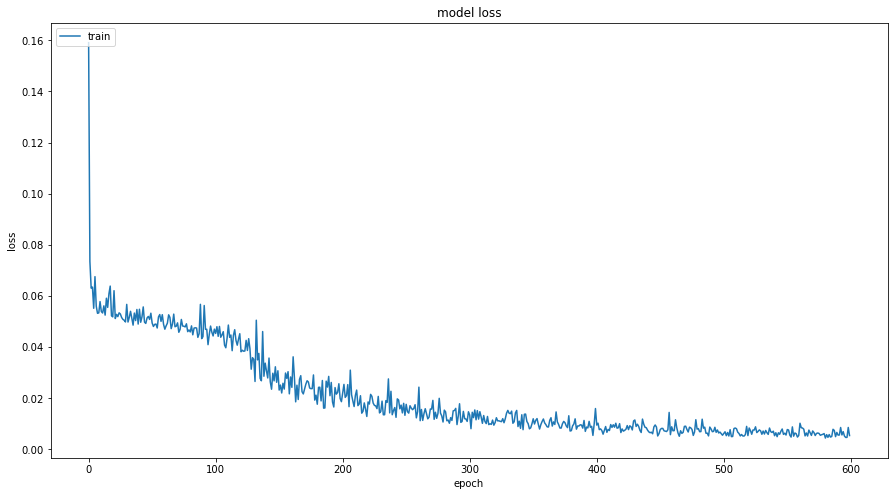

In [10]:

history_rnn=model.fit(x_data,y_data,epochs=600,validation_data =(x_test,y_test),batch_size=10)

history_rnn
loss_history = history_rnn.history["loss"]
# testing_loss_history = history_rnn.history["val_loss"]
plt.figure(figsize=(15, 8))
plt.title('model loss')
plt.plot(history_rnn.history['loss'], label='train')
# plt.plot(history_rnn.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_model_mse.png')
plt.show()

In [11]:
score=model.evaluate(x_valid,y_valid)
print('score is: test_loss %f, mae %f' % (score[0],score[1]))

1/1 [==============================] - 0s 2ms/step - loss: 0.0598 - mae: 0.1513
score is: test_loss 0.059769, mae 0.151291


In [12]:

predicted_covid_19_spread=model.predict(x_valid)
# print(predicted_covid_19_spread)
predict_val=[]
# scaler = MinMaxScaler(feature_range = (0,1))
for i in range(0,predicted_covid_19_spread.shape[0]):
  print(predicted_covid_19_spread[i].mean())
  predict_val.append(predicted_covid_19_spread[i].mean())

predict_val=np.array(predict_val).reshape(-1,1)
predict=scaler.inverse_transform(predict_val)

print("The predicted perday spread from ",test_start_date,"is")
print(predict)



0.7836736
0.78792447
0.7245278
0.5900325
0.4303332
0.49038702
0.56278586
0.6789724
0.7061627
0.70085114
The predicted perday spread from  2004/3/21 is
[[19200.787]
 [19304.938]
 [17751.654]
 [14456.387]
 [10543.594]
 [12014.973]
 [13788.816]
 [16635.504]
 [17301.691]
 [17171.555]]


In [13]:

y_valid=np.array(y_valid).reshape(-1,1)
actual=scaler.inverse_transform(y_valid)
print(actual)


[[22184.]
 [21917.]
 [21247.]
 [18017.]
 [10680.]
 [ 7763.]
 [13686.]
 [17209.]
 [18924.]
 [    0.]]


MSE = 0.011417840830156763
R-Squared Score = 0.7061194093014814


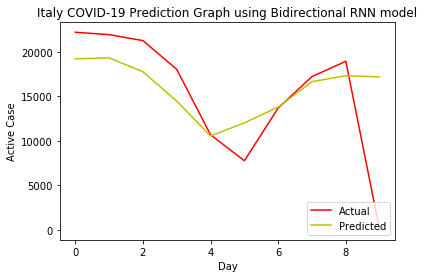

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import *
time_steps=10
def evaluate_model(model,time_steps):
    
    # Prediction Time !!!!
#     predict_val =model.predict(x_valid)
    mse = mean_squared_error(y_valid[:-1],predict_val[:-1])
#     rmse = sqrt(mse)
    r = r2_score(y_valid[:-1],predict_val[:-1])
    return mse,r, y_valid, predict
mse,r2_score,true,predicted = evaluate_model(model,time_steps)
print('MSE = {}'.format(mse))
print('R-Squared Score = {}'.format(r2_score))



def plot_data(actual,predict):
    plt.plot(actual,c = 'r')
    plt.plot(predict,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Active Case')
    plt.title('Italy COVID-19 Prediction Graph using Bidirectional RNN model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()
plot_data(actual,predict)